Question 1: What is Boosting in Machine Learning? Explain how it improves weak
learners.

Answer:

**Definition:** Boosting is an ensemble learning method that builds a strong predictive model by combining several weak learners (like shallow decision trees).
- Goal: To minimize training errors and improve overall performance in tasks such as classification, regression, and data mining.
- Examples of Boosting Algorithms: AdaBoost, Gradient Boosting, XGBoost, LightGBM, CatBoost.

- **Sequential Training:**
- Boosting trains models one after another.
- Each new model focuses on the mistakes (misclassified data points) of the previous model.
- **Weighted Emphasis:**
- Misclassified samples are given higher weights so that subsequent learners pay more attention to them.
- Correctly classified samples get lower weights.
- **Error Reduction:**
- By iteratively correcting errors, boosting reduces both bias (systematic error) and variance (sensitivity to fluctuations in data).

- **Combination of Models:**
- Final prediction is made by weighted voting (classification) or weighted averaging (regression) of all weak learners.
- This aggregation produces a strong learner with much higher accuracy than any single weak learner.






**Question 2: What is the difference between AdaBoost and Gradient Boosting in terms of how models are trained?**

Answer:

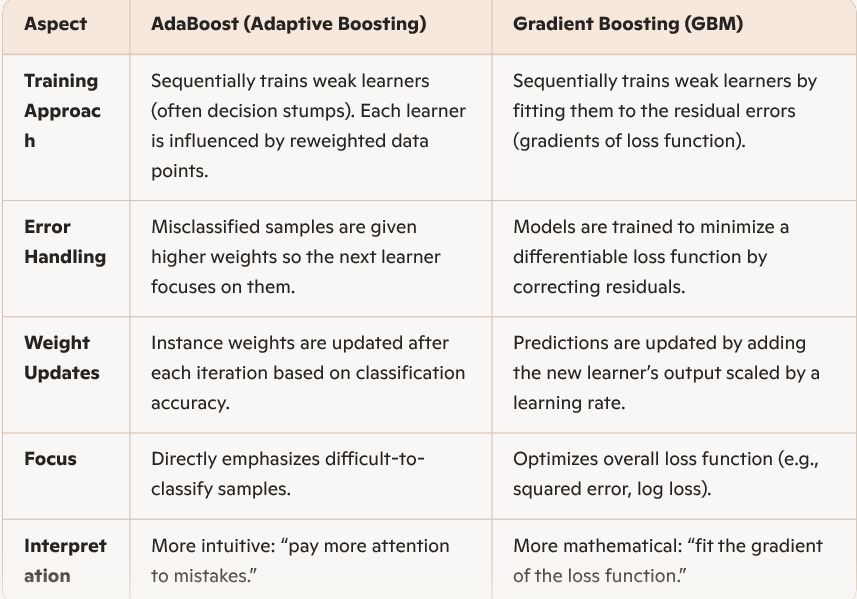


**Question 3: How does regularization help in XGBoost?**

Answer:

XGBoost is a powerful boosting algorithm that : can fit training data extremely well, easily overfit, especially with deep trees or many boosting rounds.

Objective = Training Loss + Regularization Term

a. L1 and L2 regularization - L1 (alpha) - divides some weights to zero L2 (lambda) - Shrinks leaf weights smoothly

b. Tree Pruning via Regularization -

A split is made only if it reduces loss more than y, weak splits are automaically pruned.

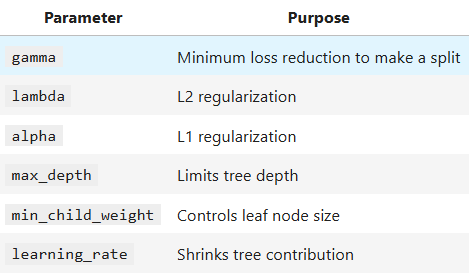


**Question 4: Why is CatBoost considered efficient for handling categorical data?**

Answer:

CatBoost is considered efficient for handling categorical data because it can process categorical features directly without extensive preprocessing, using techniques like target statistics and ordered boosting to avoid overfitting and bias.

=>No Need for Manual Encoding
- Unlike other algorithms (e.g., XGBoost, LightGBM) that require one-hot encoding or label encoding, CatBoost automatically handles categorical features.
- This saves time and reduces the risk of introducing noise or bias during preprocessing.

=> Target Statistics (Target Encoding)
- CatBoost replaces categorical values with statistics derived from the target variable (e.g., average target value for each category).
- This allows the model to capture meaningful relationships between categories and outcomes.

=> Ordered Boosting
- A unique technique in CatBoost that prevents target leakage (using future information to predict the present).
- It ensures that when calculating target statistics, only past data is used, making training more robust and reducing overfitting.

=> Oblivious Decision Trees
- CatBoost uses symmetric (oblivious) decision trees, which apply the same splitting condition across all nodes at the same depth.
- This structure makes training faster, reduces variance, and improves generalization.

=> Efficiency in Real-World Datasets
- Many business datasets (finance, e-commerce, healthcare) contain categorical features like product IDs, customer segments, or regions.
- CatBoost’s ability to handle these directly makes it highly practical and efficient.

Question 5: What are some real-world applications where boosting techniques are
preferred over bagging methods?

Answer:

a. Credit Card and Loan Deault Prediction -

 Missclasifying defaulters is costlier than misclassifying safe customers. Boosting focuses more on difficult and minority class -samples. Used algorithm - XGBoost , LightGBM, CatBoost. Predicting whether a customer will default on a loan.

b.Fraud Detection-

Fraud cases are rare and complex, boosting iteratively focuses on miscalssified fraud detections. Ex -- Credit card fraud detection, insuarance claim fraud detection.

c. Customer Churn Prediction -

Churn beaviour is subtle and non linear, boosting captures small behaviour changes over time. Predicting which customers are likely to cancel subscriptionss , targetting high -risk users with retention offers.

Question 6: Write a Python program to:
● Train an AdaBoost Classifier on the Breast Cancer dataset
● Print the model accuracy

In [1]:

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
ada = AdaBoostClassifier(n_estimators = 100, random_state = 42, learning_rate = 0.1)
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.956140350877193


Question 7: Write a Python program to:
● Train a Gradient Boosting Regressor on the California Housing dataset
● Evaluate performance using R-squared score


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

# Load local CSV
df = pd.read_csv("california_housing_test.csv")
df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


In [9]:
import pandas as pd

df = pd.read_csv("california_housing_test.csv")

for col in df.select_dtypes(include=['number']).columns:
    if df[col].isnull().any():
        df[col] = df[col].fillna(df[col].median())
df = pd.get_dummies(df, columns=['median_income'], drop_first=True)

X = df.drop("median_house_value", axis=1)
y = df["median_house_value"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = GradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)

print("R2 Score:", r2_score(y_test, model.predict(X_test)))

R2 Score: 0.5863625355104727


Question 8: Write a Python program to:
● Train an XGBoost Classifier on the Breast Cancer dataset
● Tune the learning rate using GridSearchCV
● Print the best parameters and accuracy

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score


In [4]:
data = load_breast_cancer()
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [5]:
xgb = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)

# Hyperparameter grid for learning rate
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2]
}

# GridSearchCV
grid = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
# Train model
grid.fit(X_train, y_train)

# Best model
best_model = grid.best_estimator_

# Predictions
y_pred = best_model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Results
print("Best Parameters:", grid.best_params_)
print(f"Test Accuracy: {accuracy:.4f}")

Best Parameters: {'learning_rate': 0.2}
Test Accuracy: 0.9561


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [17:32:28] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Question 9: Write a Python program to:
● Train a CatBoost Classifier
● Plot the confusion matrix using seaborn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 10.3 MB/s eta 0:00:00
Accuracy: 0.9736842105263158


<Axes: >

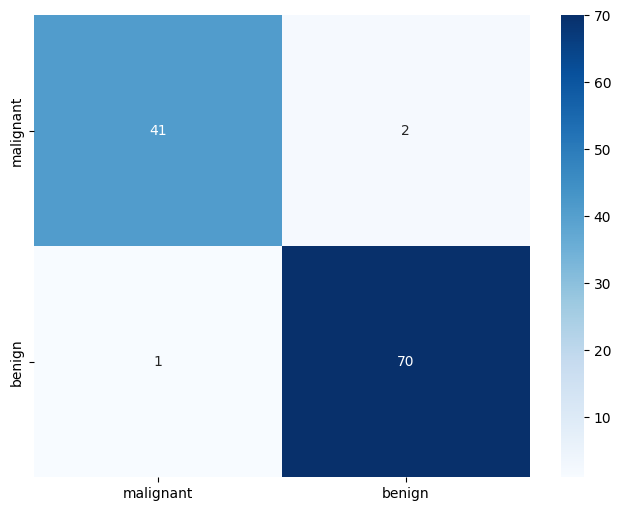

In [6]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

!pip install catboost
from catboost import CatBoostClassifier

data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test =  train_test_split(X,y, test_size = 0.2, random_state = 42)
model = CatBoostClassifier(
    iterations = 100,
    learning_rate = 0.1,
    depth = 6,
    verbose = False
)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot = True, cmap = 'Blues', xticklabels = data.target_names, yticklabels = data.target_names)

Question 10: You're working for a FinTech company trying to predict loan default using
customer demographics and transaction behavior.
The dataset is imbalanced, contains missing values, and has both numeric and
categorical features.
Describe your step-by-step data science pipeline using boosting techniques:
● Data preprocessing & handling missing/categorical values
● Choice between AdaBoost, XGBoost, or CatBoost
● Hyperparameter tuning strategy
● Evaluation metrics you'd choose and why
● How the business would benefit from your model
(Include your Python code and output in the code box below.)

Answer:

1.Data Pre-processing -
Handling missing values, by using median as it is robust to outliers for numerical values, in case of categorical values, mode can be used, tree based boosting benefit.

2. Handling categorical features - class weighting , probability threshold tuning, precision-recall optimization

3. Choice of Boosting Algorithm
CatBoost - handles catagorical features natively, robust to missing values, ordered boosting

4. Hyper Parameter Tuning Strategy - iterations, learning_rate, depth, class_weights, RandomizedSearchCV

Business Impact How the Business Benefits

Reduced loan defaults

Improved approval quality

Risk-based pricing

Faster automated credit decisions

Explainable decisions for regulators

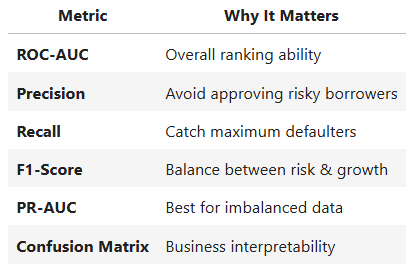